<a href="https://colab.research.google.com/github/BasilaThasni/VehicleCoupon_Acceptance_Prediction_ML_PROJECT/blob/main/VehicleCoupon_Acceptance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files  #import the dataset
uploaded = files.upload()

Saving in-vehicle-coupon-recommendation.csv to in-vehicle-coupon-recommendation.csv


In [2]:
#import the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2


In [3]:
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")

In [4]:
df  #show the dataframe

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [5]:
df.shape #show number of columns and rows of the dataset

(12684, 26)

In [6]:
df.describe() #show statistical measures of the dataset


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.duplicated().sum() #show number of duplicated rows in the dataset

74

In [8]:
df[df.duplicated()] #show duplicated rows


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


In [9]:
df.drop_duplicates(inplace=True,ignore_index=True) #remove duplicated rows

In [10]:
df.duplicated().sum() #show number of duplicated rows again

0

In [11]:
df.shape #show shape again

(12610, 26)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null

##Found that there are only 108 entries in the column 'car'.So,removing the entire column will be suitable since the feature 'car' does not create any impact on vehicle coupon prediction.

In [13]:
df.drop(columns=['car'],inplace = True) #Remove the column 'car'.


In [14]:
df.shape

(12610, 25)

In [15]:
df.isnull().sum() #show numberof null values in each column

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


##Found that there are null values in the columns 'Bar',CoffeeHouse','CarryAway',Restaurantlesstahn20'and 'Restaurant20To50'.

In [16]:
df.dropna(inplace=True) #remove the rows having null values

##Removed the rows having null values.

In [17]:
df.shape

(12007, 25)

In [18]:
df.isnull().sum()


,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


##All the null values are removed.

In [19]:
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12605,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12606,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12607,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12608,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [20]:
df.reset_index(drop=True,inplace=True) #reset the index

In [21]:
df #show the df after reseting the index

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12003,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12004,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12005,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [22]:
#show the names of the columns with categorical data.
categorical_columns = df.select_dtypes(include=['object']).columns
print(list(categorical_columns))

['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [23]:
print(len(categorical_columns)) #show the number of categorical columns.

17


##There are 17 columns with categorical data.

In [24]:
#show the names of the columns having numerical columns.
numerical_columns = df.select_dtypes(include=['number']).columns
print(list(numerical_columns))


['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


In [25]:
print(len(numerical_columns))

8


##There are 8 columns with numerical data.

In [26]:
categorical_df = df[categorical_columns]
numerical_df = df[numerical_columns]

In [27]:
for x in categorical_df.columns:
    print(f"{x}': {categorical_df[x].unique()}\n")


destination': ['No Urgent Place' 'Home' 'Work']

passanger': ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

weather': ['Sunny' 'Rainy' 'Snowy']

time': ['2PM' '10AM' '6PM' '7AM' '10PM']

coupon': ['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']

expiration': ['1d' '2h']

gender': ['Male' 'Female']

age': ['21' '46' '26' '31' '41' '50plus' '36' 'below21']

maritalStatus': ['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']

education': ['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

occupation': ['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Const

In [28]:
df['temperature'].unique()


array([55, 80, 30])

In [29]:
categorical_df

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,2h,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
2,No Urgent Place,Friend(s),Sunny,10AM,Bar,1d,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
3,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,2h,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Home,Partner,Rainy,6PM,Carry out & Take away,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3
12003,Work,Alone,Rainy,7AM,Carry out & Take away,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3
12004,Work,Alone,Snowy,7AM,Coffee House,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3
12005,Work,Alone,Snowy,7AM,Bar,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3


In [30]:
df=df.rename(columns={"passanger":"passenger"}) #renamed 'passanger' to 'passenger' for better understanding.
df

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12003,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12004,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12005,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


#ENCODING

##Ordered features can be encoded using 'OrdinalEncoder'.The ordered features are:
###-age
###-income
###-education
###-CarryAway
###-RestaurantLessThan20
###-Restaurant20To50
###-Bar
###-CoffeHouse


In [31]:
#create lists of orders of each feature.
age_order = ['below21','21','26','31','36','41','46','50plus']
income_order = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More']
education_order = ['Some High School','High School Graduate','Some college - no degree','Associates degree','Bachelors degree','Graduate degree (Masters or Doctorate)']
restaurant_order = ['never','less1','1~3','4~8','gt8']

In [32]:
#create a dictionary mapping the features with thier orders:
ordered_features = {'age':'age_order',
                    'income':'income_order',
                    'education':'education_order',
                    'RestaurantLessThan20':'restaurant_order',
                    'Restaurant20To50':'restaurant_order',
                    'Bar':'restaurant_order',
                    'CoffeeHouse':'restaurant_order',
                    'CarryAway':'restaurant_order'}

In [33]:
#Pass the category orders to the OrdinalEncoder.
encoder = OrdinalEncoder(categories=[globals()[ordered_features[col]] for col in ordered_features])


In [34]:
# Apply OrdinalEncoder to the specified columns

df[list(ordered_features.keys())] = encoder.fit_transform(df[list(ordered_features.keys())])

In [35]:

print(df[ordered_features.keys()].head())

   age  income  education  RestaurantLessThan20  Restaurant20To50  Bar  \
0  1.0     5.0        4.0                   3.0               1.0  0.0   
1  1.0     5.0        4.0                   3.0               1.0  0.0   
2  1.0     5.0        4.0                   3.0               1.0  0.0   
3  1.0     5.0        4.0                   3.0               1.0  0.0   
4  1.0     5.0        4.0                   3.0               1.0  0.0   

   CoffeeHouse  CarryAway  
0          1.0        3.0  
1          1.0        3.0  
2          1.0        3.0  
3          1.0        3.0  
4          1.0        3.0  


In [36]:
df


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,1.0,Single,...,1.0,3.0,3.0,1.0,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,1.0,Single,...,1.0,3.0,3.0,1.0,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,1.0,Single,...,1.0,3.0,3.0,1.0,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,1.0,Single,...,1.0,3.0,3.0,1.0,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,1.0,Single,...,1.0,3.0,3.0,1.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,2.0,Single,...,0.0,2.0,3.0,2.0,1,0,0,1,0,1
12003,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,2.0,Single,...,0.0,2.0,3.0,2.0,1,0,0,0,1,1
12004,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,2.0,Single,...,0.0,2.0,3.0,2.0,1,0,0,1,0,0
12005,Work,Alone,Snowy,30,7AM,Bar,1d,Male,2.0,Single,...,0.0,2.0,3.0,2.0,1,1,1,0,1,0


##The unordered features are encoded using 'OneHotEncoder'.The features are:
###-destination
###-passenger
###-weather
###-time
###-coupon
###-expiration
###-gender
###-maritalStatus
###-occupation

In [37]:
data = {
    'destination': ['No Urgent Place' ,'Home' ,'Work'],
'passenger': ['Alone' ,'Friend(s)' ,'Kid(s)', 'Partner'],
'weather': ['Sunny' ,'Rainy' ,'Snowy'],
'time': ['2PM' ,'10AM' ,'6PM' ,'7AM' ,'10PM'],
'coupon': ['Restaurant(<20)','Coffee House', 'Bar' ,'Carry out & Take away','Restaurant(20-50)'],
'expiration': ['1d' ,'2h'],
'gender': ['Male' ,'Female'],
'maritalStatus': ['Single', 'Married partner' ,'Unmarried partner' ,'Divorced' 'Widowed'],
'occupation': ['Architecture & Engineering' ,'Student', 'Education&Training&Library',
 'Unemployed', 'Healthcare Support', 'Healthcare Practitioners & Technical',
 'Sales & Related' ,'Management', 'Arts Design Entertainment Sports & Media',
 'Computer & Mathematical' ,'Life Physical Social Science',
 'Personal Care & Service', 'Office & Administrative Support',
 'Construction & Extraction', 'Legal' ,'Retired',
 'Community & Social Services' ,'Installation Maintenance & Repair',
 'Transportation & Material Moving', 'Business & Financial',
 'Protective Service' ,'Food Preparation & Serving Related',
 'Production Occupations' ,'Building & Grounds Cleaning & Maintenance',
 'Farming Fishing & Forestry']}

In [38]:
df_encoded = pd.get_dummies(df, columns=['destination', 'passenger', 'weather','time','coupon','expiration','gender','maritalStatus','occupation'], drop_first=True)

In [39]:
df_encoded

,temperature,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,...,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
0,55,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,80,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,80,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,80,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,80,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,55,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False
12003,55,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False
12004,30,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False
12005,30,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False


#SCALING:

##The one and only numerical feature is scaled using Standardscaler:

In [40]:
temp_scaler = StandardScaler()
df_encoded['temperature'] = temp_scaler.fit_transform(df_encoded[['temperature']])

In [41]:
df_encoded

,temperature,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,...,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
0,-0.433928,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,0.872862,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,0.872862,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,0.872862,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,0.872862,1.0,0,4.0,5.0,0.0,1.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,-0.433928,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False
12003,-0.433928,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False
12004,-1.740718,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False
12005,-1.740718,2.0,0,4.0,6.0,0.0,0.0,2.0,3.0,2.0,...,False,False,False,False,False,False,True,False,False,False


In [42]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12007 entries, 0 to 12006
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   temperature                                           12007 non-null  float64
 1   age                                                   12007 non-null  float64
 2   has_children                                          12007 non-null  int64  
 3   education                                             12007 non-null  float64
 4   income                                                12007 non-null  float64
 5   Bar                                                   12007 non-null  float64
 6   CoffeeHouse                                           12007 non-null  float64
 7   CarryAway                                             12007 non-null  float64
 8   RestaurantLessThan20                                  12

In [43]:
correlation_matrix = df_encoded.corr()
correlation_matrix

,temperature,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,...,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
temperature,1.000000,-0.012817,-0.019496,0.011123,-0.023571,0.002155,-0.016415,0.012820,0.031214,-0.026109,...,0.045417,-0.015069,-0.014366,-0.013973,0.024792,0.028368,-0.007001,0.020331,0.002129,-0.032694
age,-0.012817,1.000000,0.437749,0.164928,0.078312,-0.162388,-0.053268,-0.061008,0.005138,-0.001320,...,0.055013,0.009906,0.129120,0.079938,0.019724,0.309698,-0.002690,-0.391889,0.076507,-0.081053
has_children,-0.019496,0.437749,1.000000,0.090558,0.099226,-0.205927,0.034822,-0.063051,-0.031058,-0.012380,...,0.040702,-0.059011,0.104892,-0.027104,-0.008703,0.112076,-0.052533,-0.212160,0.051859,-0.008516
education,0.011123,0.164928,0.090558,1.000000,0.301799,0.041232,0.099271,-0.044642,0.085309,0.041148,...,0.096623,-0.079659,-0.023645,-0.091009,-0.047053,0.071122,-0.025817,-0.150403,-0.066149,-0.112747
income,-0.023571,0.078312,0.099226,0.301799,1.000000,0.043793,-0.020163,0.023319,0.110467,0.166791,...,0.078358,-0.073882,0.043613,-0.066695,0.029866,0.008201,-0.059855,-0.119602,-0.002242,-0.089718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
occupation_Retired,0.028368,0.309698,0.112076,0.071122,0.008201,-0.133088,-0.078258,-0.078471,0.007768,-0.039048,...,-0.052341,-0.046989,-0.022956,-0.017263,-0.024502,1.000000,-0.063104,-0.076026,-0.027477,-0.084992
occupation_Sales & Related,-0.007001,-0.002690,-0.052533,-0.025817,-0.059855,-0.019159,-0.051718,-0.006486,-0.021932,-0.032550,...,-0.080897,-0.072624,-0.035480,-0.026681,-0.037870,-0.063104,1.000000,-0.117504,-0.042468,-0.131362
occupation_Student,0.020331,-0.391889,-0.212160,-0.150403,-0.119602,-0.021492,0.116038,0.005487,-0.015483,-0.033328,...,-0.097463,-0.087496,-0.042746,-0.032144,-0.045626,-0.076026,-0.117504,1.000000,-0.051165,-0.158262
occupation_Transportation & Material Moving,0.002129,0.076507,0.051859,-0.066149,-0.002242,0.008244,-0.008925,0.010003,0.058181,-0.012368,...,-0.035225,-0.031623,-0.015449,-0.011617,-0.016490,-0.027477,-0.042468,-0.051165,1.000000,-0.057199


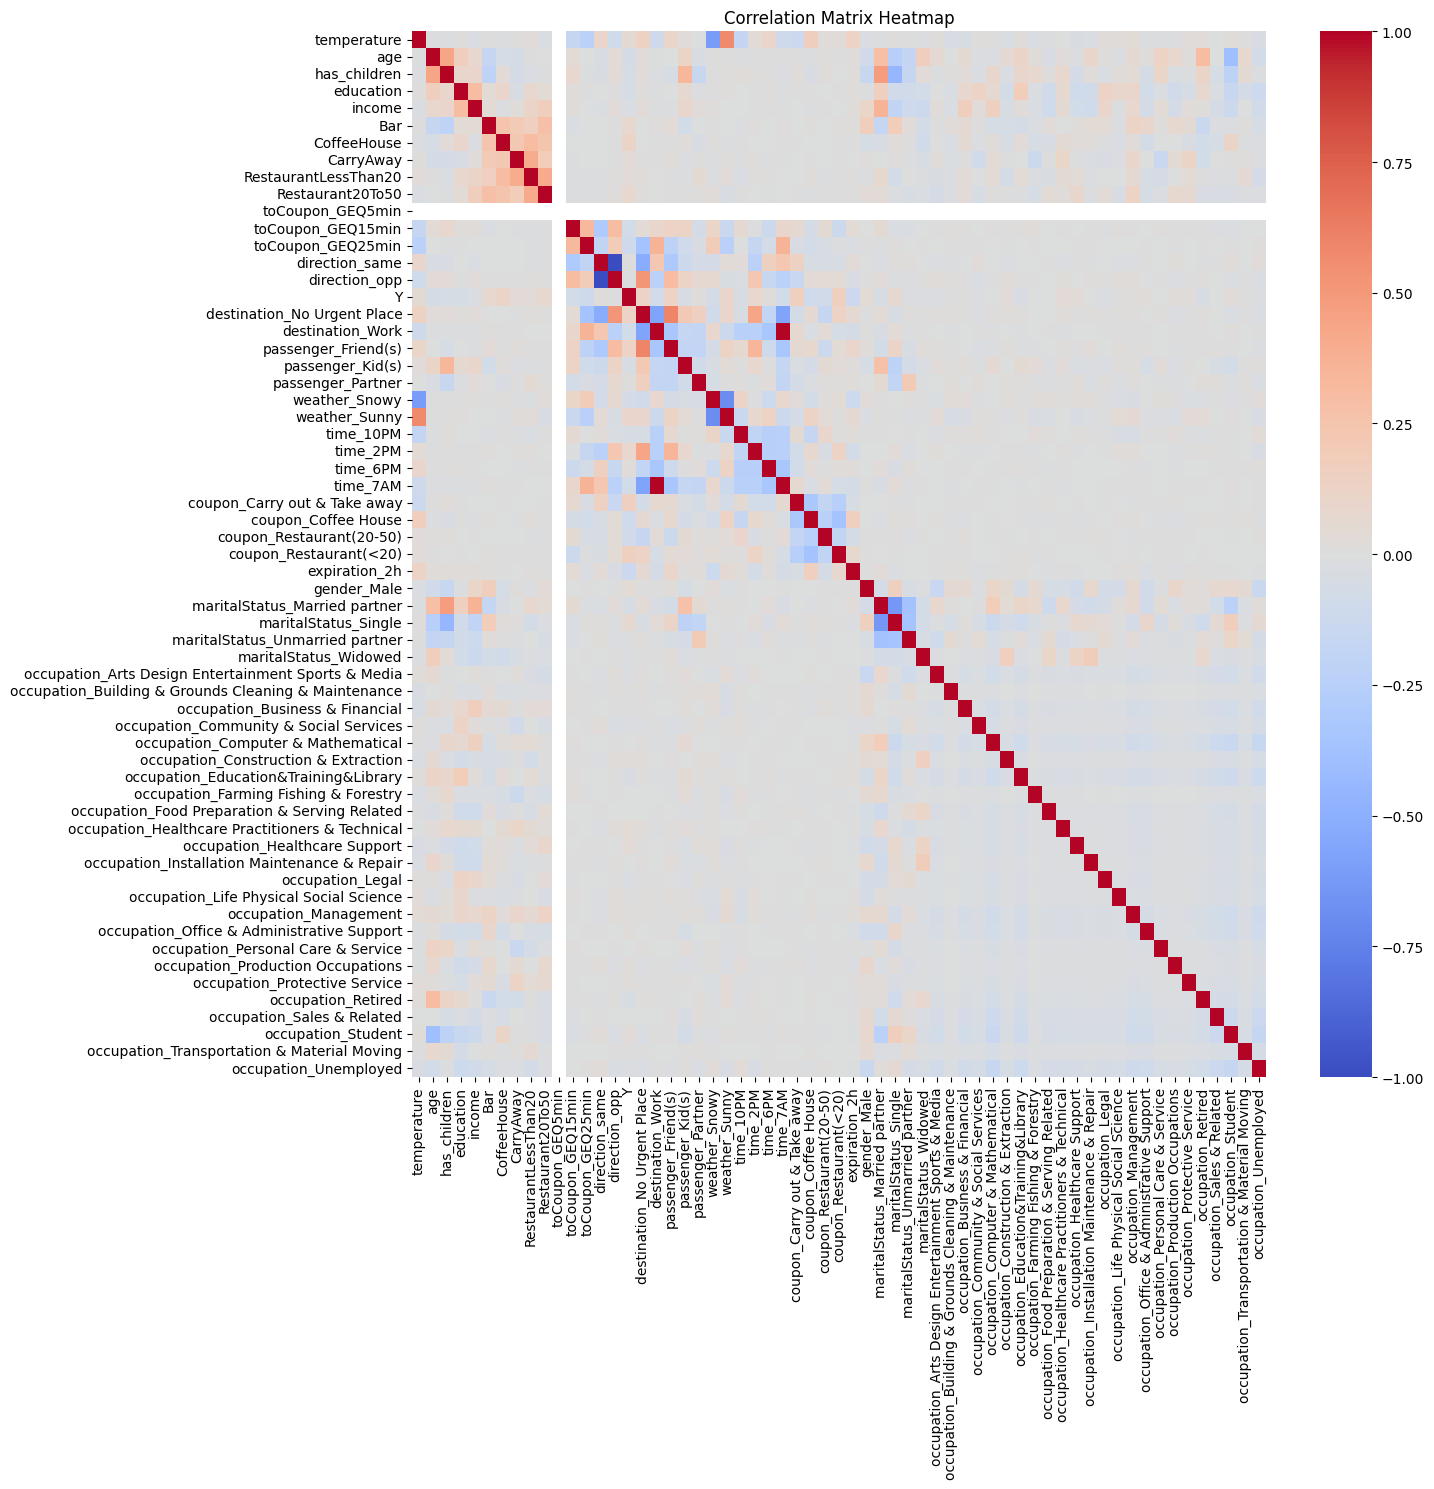

In [44]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix,annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

##Inference from the correlation matrix:
###The columns 'Bar','CoffeeHouse',Destination_No Urgent Place','passenger_Friend(s)','weather_Sunny',Coupon_Carry out & Take Away','Coupon_Restaurant(<20)'and 'temperature' **show positive correlation which is  weak'**.

###The columns 'expiration_2h','Coupon_Restaurant(20To50)','Coupon_Coffeehouse','MaritalStatus_Marriedpartner','age','income','has_children' and 'education' **show negative correlation which is weak**.

##Feature selection using PCA:

In [45]:
pca = PCA(n_components=None)
pca.fit(df_encoded)

PCA()

In [46]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:" ,explained_variance_ratio)

Explained Variance Ratio: [2.83392024e-01 1.90898599e-01 9.00530023e-02 5.74197623e-02
 4.82083462e-02 4.15038442e-02 3.65294720e-02 2.84560727e-02
 2.66478177e-02 1.66348981e-02 1.60076499e-02 1.56090406e-02
 1.29045787e-02 1.02315816e-02 1.00215387e-02 9.83307728e-03
 9.45903237e-03 8.77044887e-03 8.42502467e-03 6.28891987e-03
 5.91546045e-03 5.48649348e-03 5.08117531e-03 4.95596224e-03
 4.81226491e-03 4.45530384e-03 4.16348007e-03 3.75492015e-03
 3.45011221e-03 2.88027564e-03 2.63666656e-03 2.58650329e-03
 2.12854236e-03 2.00651580e-03 1.93682997e-03 1.66973353e-03
 1.44956766e-03 1.43262293e-03 1.30756993e-03 1.11774083e-03
 9.42628136e-04 8.83205994e-04 7.69377534e-04 7.28493911e-04
 7.21292186e-04 7.05242008e-04 6.95036258e-04 6.12356970e-04
 6.02431806e-04 5.65264608e-04 5.01856750e-04 4.83288479e-04
 4.35994484e-04 2.94095200e-04 2.16381584e-04 1.53922934e-04
 1.44337333e-04 2.23219827e-05 5.54358714e-18 3.85267707e-18
 3.45097192e-18]


In [47]:
cumulative_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:",cumulative_variance)

Cumulative Explained Variance: [0.28339202 0.47429062 0.56434363 0.62176339 0.66997173 0.71147558
 0.74800505 0.77646112 0.80310894 0.81974384 0.83575149 0.85136053
 0.86426511 0.87449669 0.88451823 0.8943513  0.90381034 0.91258079
 0.92100581 0.92729473 0.93321019 0.93869668 0.94377786 0.94873382
 0.95354609 0.95800139 0.96216487 0.96591979 0.9693699  0.97225018
 0.97488685 0.97747335 0.97960189 0.98160841 0.98354524 0.98521497
 0.98666454 0.98809716 0.98940473 0.99052247 0.9914651  0.99234831
 0.99311768 0.99384618 0.99456747 0.99527271 0.99596775 0.9965801
 0.99718254 0.9977478  0.99824966 0.99873295 0.99916894 0.99946304
 0.99967942 0.99983334 0.99997768 1.         1.         1.
 1.        ]


In [48]:
pca = PCA(n_components=3)
df_reduced = pca.fit_transform(df_encoded)


In [49]:
# PCA components (loadings)
loadings = pd.DataFrame(pca.components_, columns=df_encoded.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)]) # Changed df to df_encoded to use columns from the encoded DataFrame
print("PCA Loadings:")
print(loadings)

PCA Loadings:
     temperature       age  has_children  education    income       Bar  \
PC1    -0.010499  0.236334      0.037635   0.198248  0.940972  0.007875   
PC2    -0.003049  0.940270      0.098449   0.056532 -0.255097 -0.131891   
PC3     0.002380  0.105156     -0.001022   0.185734 -0.104507  0.395916   

     CoffeeHouse  CarryAway  RestaurantLessThan20  Restaurant20To50  ...  \
PC1    -0.005009   0.006227              0.047974          0.062521  ...   
PC2    -0.061406  -0.051345             -0.032206         -0.042703  ...   
PC3     0.682745   0.300909              0.367427          0.302990  ...   

     occupation_Management  occupation_Office & Administrative Support  \
PC1               0.009075                                   -0.006497   
PC2               0.002106                                    0.002590   
PC3               0.020124                                   -0.005035   

     occupation_Personal Care & Service  occupation_Production Occupations  \
PC1  

#Dominant Features per PC:

##PC1 (First Principal Component):
##Income (0.940972) has the highest contribution, followed by Age (0.236334) and Education (0.198248).
##This suggests that income dominates the variance captured by PC1.
##PC2 (Second Principal Component):
##Age (0.940270) is the dominant feature, followed by Has_Children (0.098449).
##This indicates PC2 captures variance related primarily to age.
##PC3 (Third Principal Component):
##CoffeeHouse (0.682745) and CarryAway (0.300909) contribute significantly, suggesting PC3 focuses on behaviors related to eating out or coffee consumption.
##Inference from PCA Loadings
##PC1 Captures Socioeconomic Factors:

##Features like income, age, and education dominate PC1.
##This PC may represent a socioeconomic dimension, separating individuals based on wealth and education levels.
##PC2 Captures Family Structure:

##Age and Has_Children dominate PC2.
##This PC might differentiate based on life stage and family structure.
##PC3 Captures Behavioral Patterns:

##CoffeeHouse, CarryAway, and RestaurantLessThan20 dominate PC3.
##This PC likely represents lifestyle choices regarding food and beverage consumption.


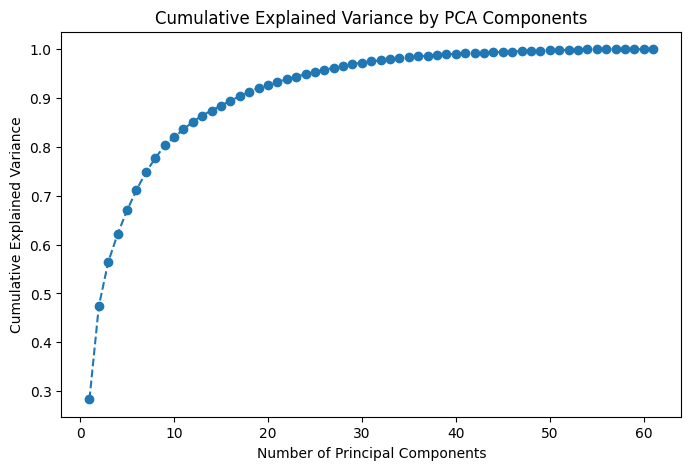

In [50]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


#**Key Observations**
##Rapid Growth Initially: The curve rises sharply for the first few components, meaning that a few principal components explain most of the variance in your data.
##Flattening After ~15 Components: After around 15 components, the curve starts to flatten, indicating diminishing returns in the variance explained by adding more components.
##Almost Full Variance Explained (~95-100%): By the time you include ~30–40 components, the cumulative explained variance approaches 100%, meaning most of the original dataset's variance is retained.
#**2. Inference:**
##Number of Components to Retain:
##If you want to explain 95% of the variance, choose the number of components corresponding to a cumulative explained variance of 0.95 (likely around 15–20 components from this plot).
##Retaining fewer components (e.g., 10–15) may still be sufficient if a slightly lower variance (e.g., 90%) is acceptable. This depends on your trade-off between dimensionality reduction and information retention.


In [51]:
df_reduced

array([[ 0.77875684, -2.37750378, -0.62726701],
       [ 0.77178405, -2.36828234, -0.65839038],
       [ 0.76181422, -2.38404899, -0.62303347],
       ...,
       [ 2.01008485, -1.62350365, -1.37395705],
       [ 2.02975965, -1.60126524, -1.37331057],
       [ 1.98741488, -1.62244998, -1.36699502]])

In [54]:
# Assuming X_reduced is the output of PCA transformation
columns = [f'PC{i+1}' for i in range(df_reduced.shape[1])]  # Create column names for principal components
df_reduced_df = pd.DataFrame(df_reduced, columns=columns)

# Display the resulting DataFrame
df_reduced_df.head()


,PC1,PC2,PC3
0,0.778757,-2.377504,-0.627267
1,0.771784,-2.368282,-0.658390
2,0.761814,-2.384049,-0.623033
3,0.780974,-2.355338,-0.661771
4,0.768155,-2.370631,-0.658525
